In [1]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# Load the dataset
data = pd.read_csv('self_reported_health.csv')

# Prepare suburb coordinates
suburb_coords = { 
    "North Melbourne 3051 /West Melbourne 3003": (-37.798, 144.956),
    "Parkville 3052": (-37.787, 144.948),
    "Southbank/ South Wharf 3006": (-37.825, 144.958),
    "Kensington / Flemington 3031": (-37.7941, 144.9279),
    "City of Melbourne": (-37.8162, 144.964),
    "Melbourne 3000": (-37.8136, 144.9631),
    "Carlton 3053": (-37.7984, 144.9694),
    "East Melbourne 3002": (-37.8130, 144.9842),
    "Docklands 3008": (-37.8141, 144.9446),
    "South Yarra 3141/Melbourne/St Kilda Road 3004": (-37.8370, 144.989)
}

# Filter for suburb data
suburb_data = data[data["Category"] == "Suburb"]

# Create Base Map
melbourne_map = folium.Map(location=[-37.8136, 144.9631], zoom_start=12)  # Base map with Melbourne's central coordinates

# Add markers for each suburb and year
marker_cluster = MarkerCluster().add_to(melbourne_map)

# Group the data by suburb
grouped_data = suburb_data.groupby("Subcategory")

for suburb, group in grouped_data:
    coords = suburb_coords.get(suburb, None)  # Get coordinates for the suburb
    if coords:
        # Find the highest and lowest percentages for the suburb
        highest_percentage = group["percentage"].max()
        lowest_percentage = group["percentage"].min()

        # Iterate over each year within the suburb group
        for _, row in group.iterrows():
            year = row["Year"]  # Extract the year
            percentage = row["percentage"]  # Extract the percentage

            # Determine marker color
            if percentage == highest_percentage:
                color = 'green'  # Highest percentage for the suburb
            elif percentage == lowest_percentage:
                color = 'red'  # Lowest percentage for the suburb
            else:
                color = 'blue'  # Default color

            # Add marker to the map
            folium.Marker(
                location=coords,
                popup=f"{suburb}<br>Year: {year}<br>Percentage: {percentage}%",  # Display year and percentage
                tooltip=f"{suburb} ({year})",
                icon=folium.Icon(color=color)  # Set marker color
            ).add_to(marker_cluster)

# Save Map
melbourne_map.save("melbourne_map.html")  # Save the map as an HTML file

print("Map saved as melbourne_map.html. Open this file in a browser.")


Map saved as melbourne_map.html. Open this file in a browser.


## Linear Regression

In [2]:
pip install pandas numpy scikit-learn


Note: you may need to restart the kernel to use updated packages.


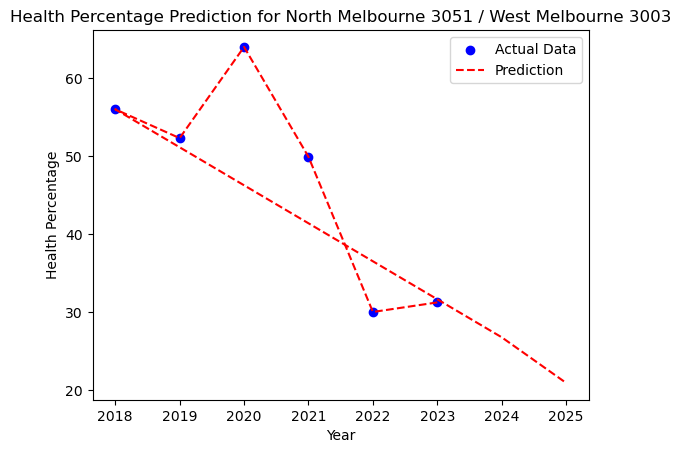

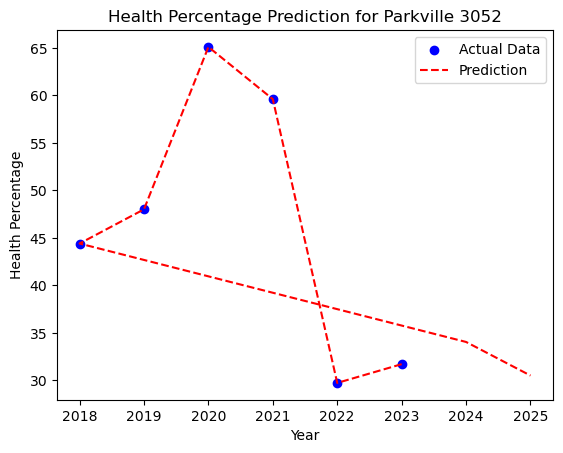

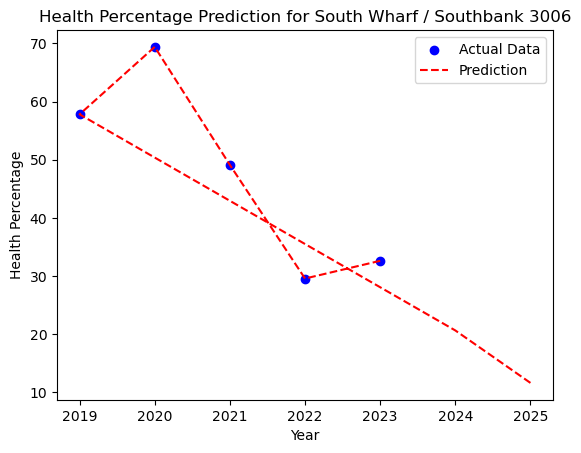

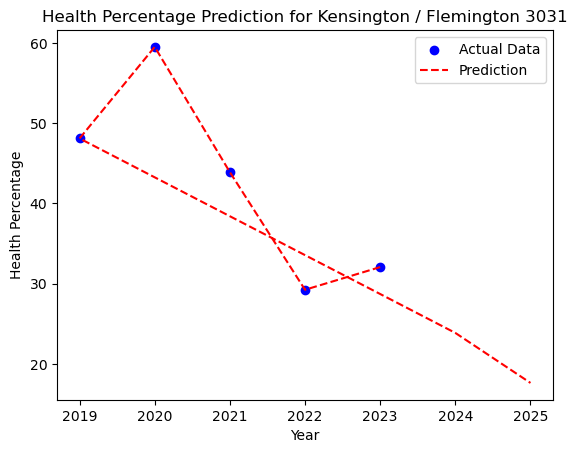

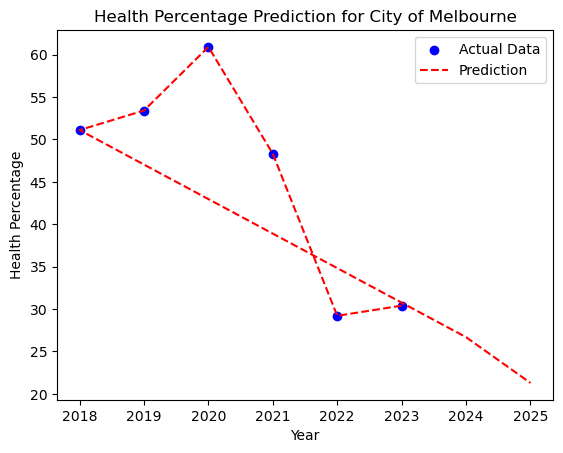

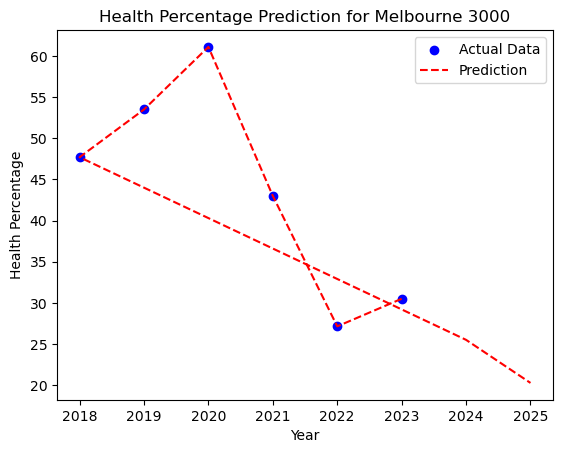

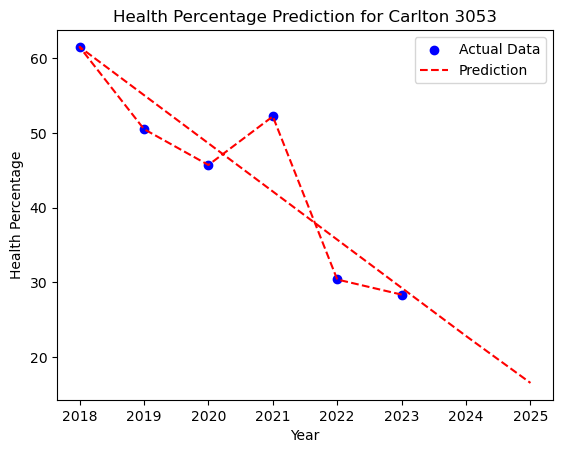

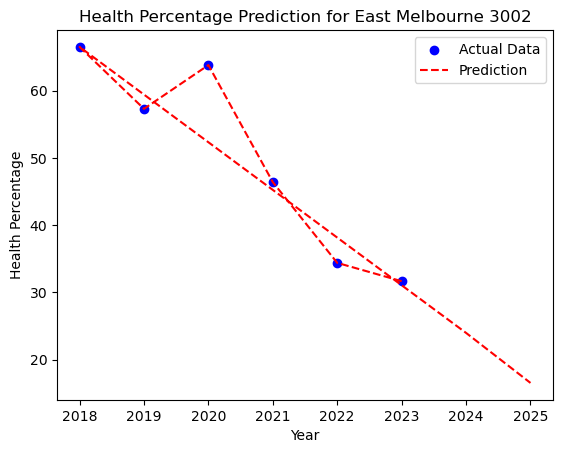

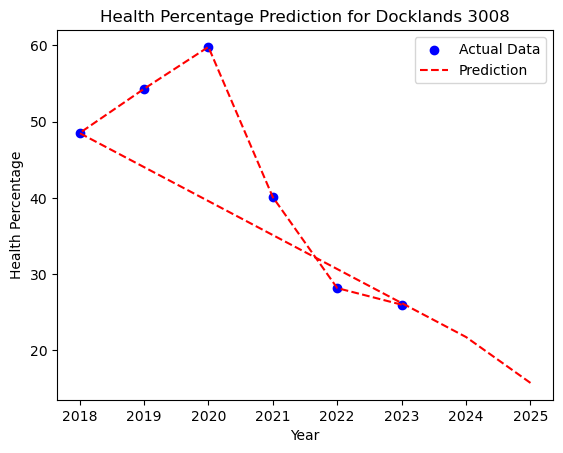

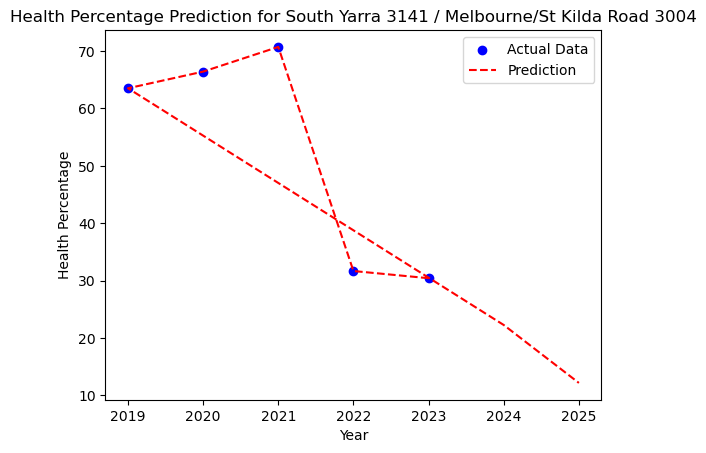

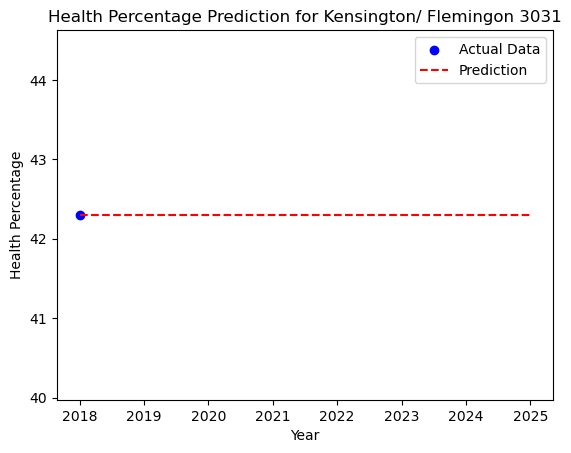

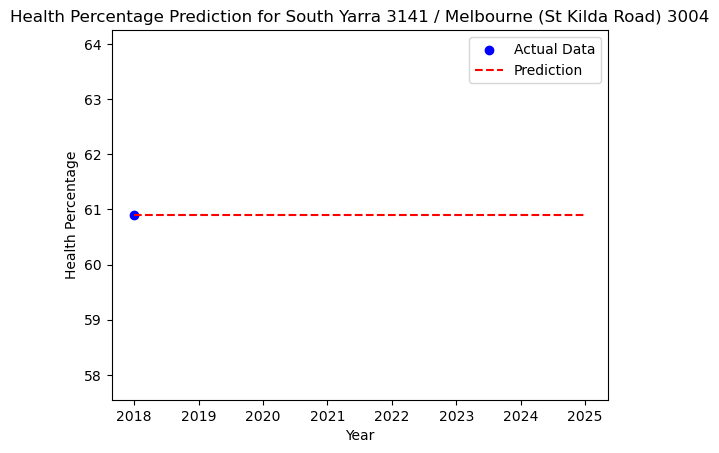

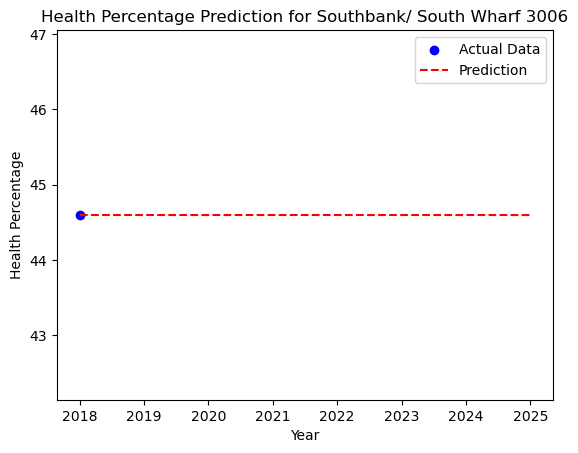

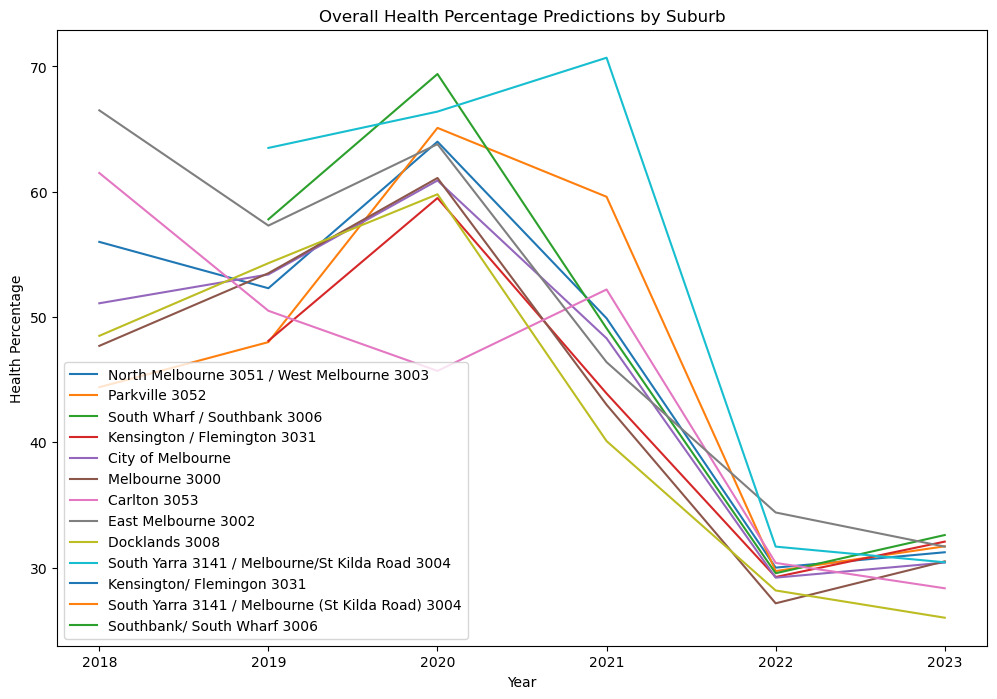

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the dataset
file_path = 'self_reported_health.csv'
df = pd.read_csv(file_path)

#filter Suburb data
suburb_data = df[df['Category'] == 'Suburb']

#
# Initialize lists to store results
predicted_years = []
predicted_percentages = []

# Iterate over each suburb
for suburb in suburb_data['Subcategory'].unique():
    # Filter data for the current suburb
    suburb_specific_data = suburb_data[suburb_data['Subcategory'] == suburb]
    
    # Extract features and target
    X = suburb_specific_data['Year'].values.reshape(-1, 1)
    y = suburb_specific_data['percentage'].values
    
    # Train Linear Regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Predict for the next two years
    future_years = np.array([2024, 2025]).reshape(-1, 1)
    predictions = model.predict(future_years)
    
    # Append results
    predicted_years.extend(future_years.flatten())
    predicted_percentages.extend(predictions)
    
    # Plot actual and predicted data for the suburb
    plt.figure()
    plt.scatter(X, y, label='Actual Data', color='blue')
    plt.plot(np.vstack((X, future_years)), 
             np.hstack((y, predictions)), 
             label='Prediction', color='red', linestyle='--')
    plt.title(f"Health Percentage Prediction for {suburb}")
    plt.xlabel("Year")
    plt.ylabel("Health Percentage")
    plt.legend()
    plt.show()

# Combine predictions with original data for a summary plot
predicted_df = pd.DataFrame({
    'Year': predicted_years,
    'percentage': predicted_percentages,
    'Suburb': 'Predicted'
})
combined_data = pd.concat([suburb_data, predicted_df])

# Plot overall results for all suburbs
plt.figure(figsize=(12, 8))
for suburb in suburb_data['Subcategory'].unique():
    suburb_combined = combined_data[combined_data['Subcategory'] == suburb]
    plt.plot(suburb_combined['Year'], suburb_combined['percentage'], label=suburb)

plt.title("Overall Health Percentage Predictions by Suburb")
plt.xlabel("Year")
plt.ylabel("Health Percentage")
plt.legend()
plt.show()



## Support Vector Machine Regression (SVM)

SVM models are generally used for non-linear data with the aim of generating a generalised model.

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


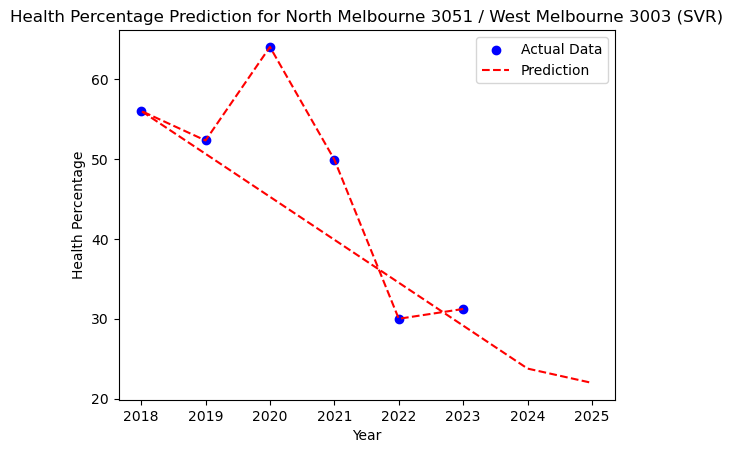

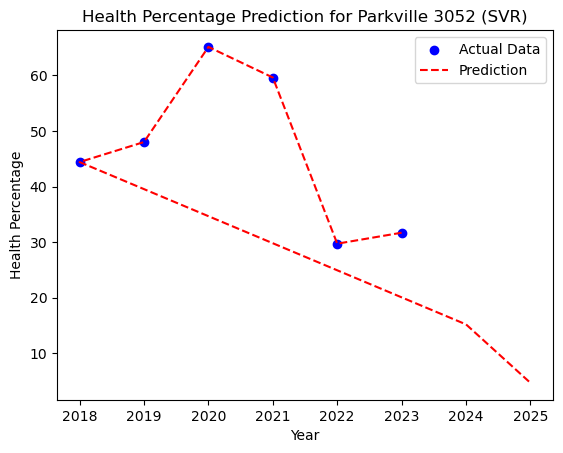

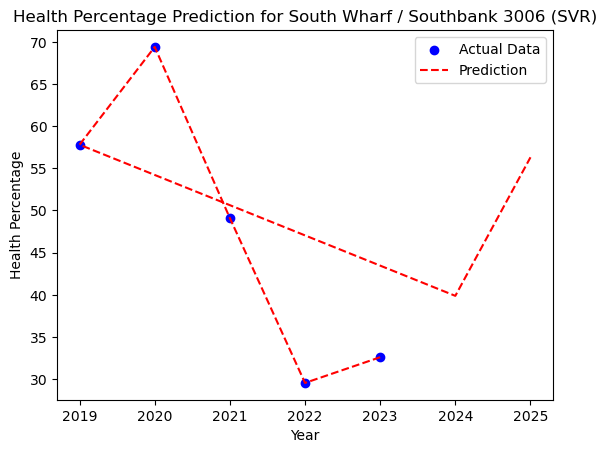

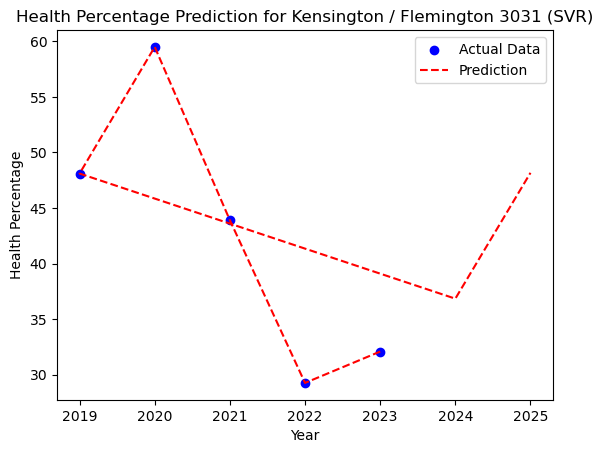

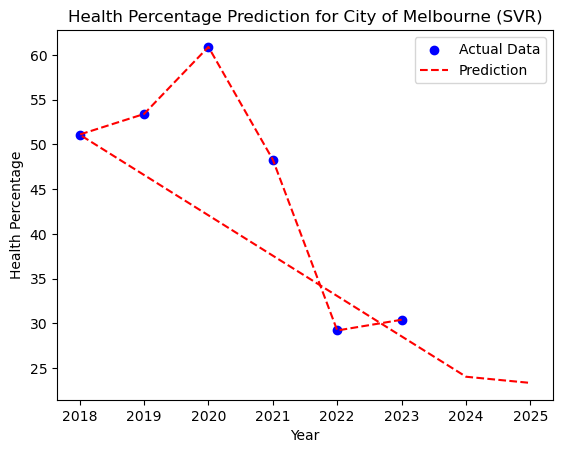

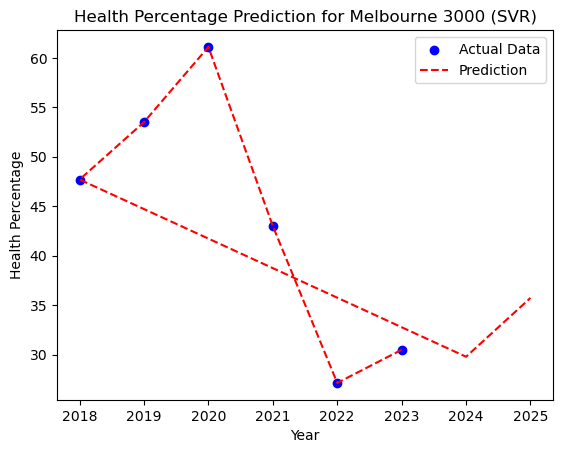

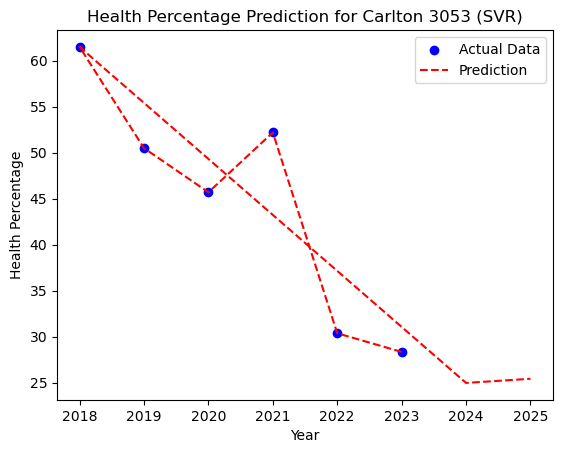

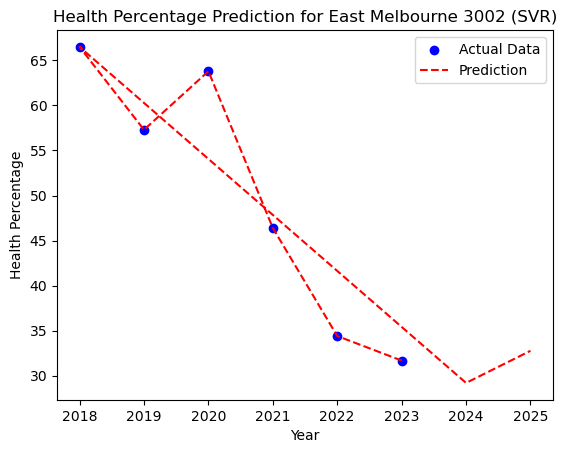

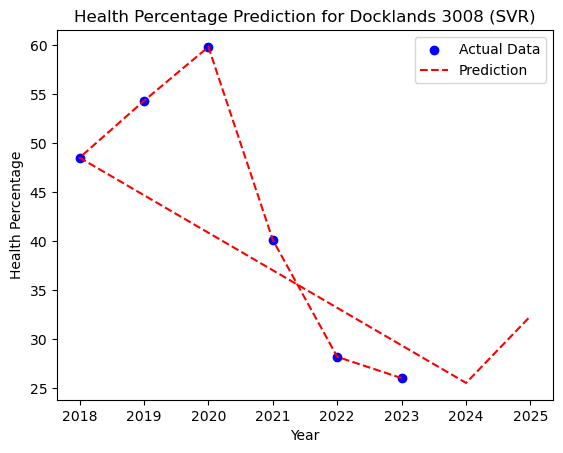

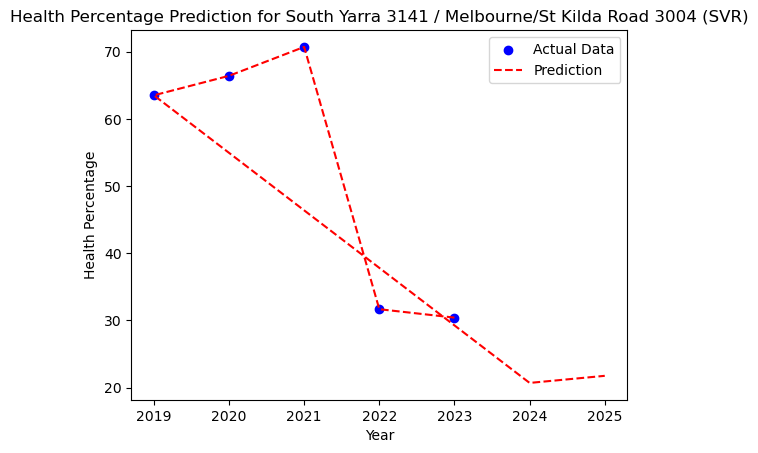

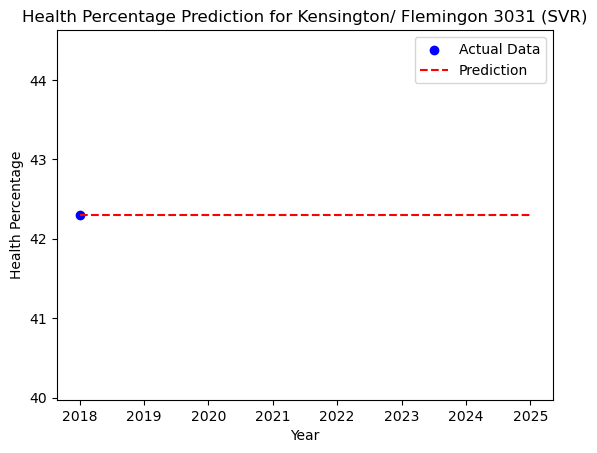

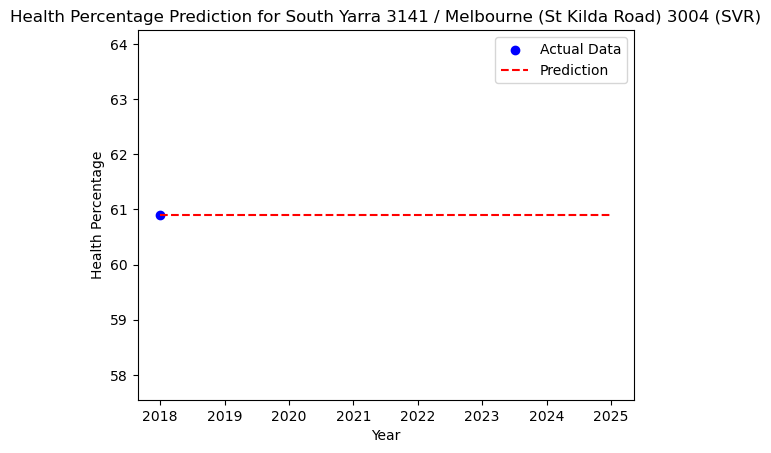

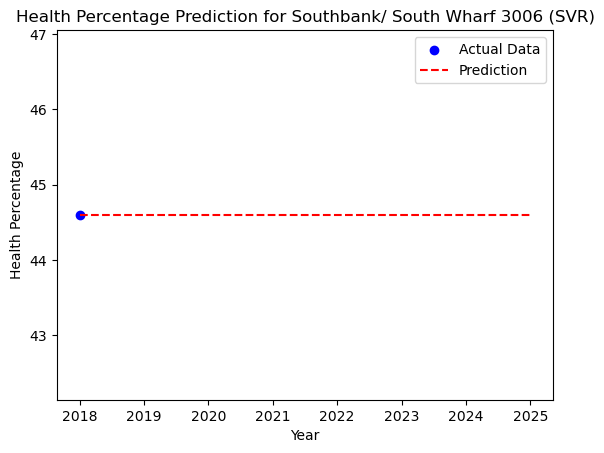

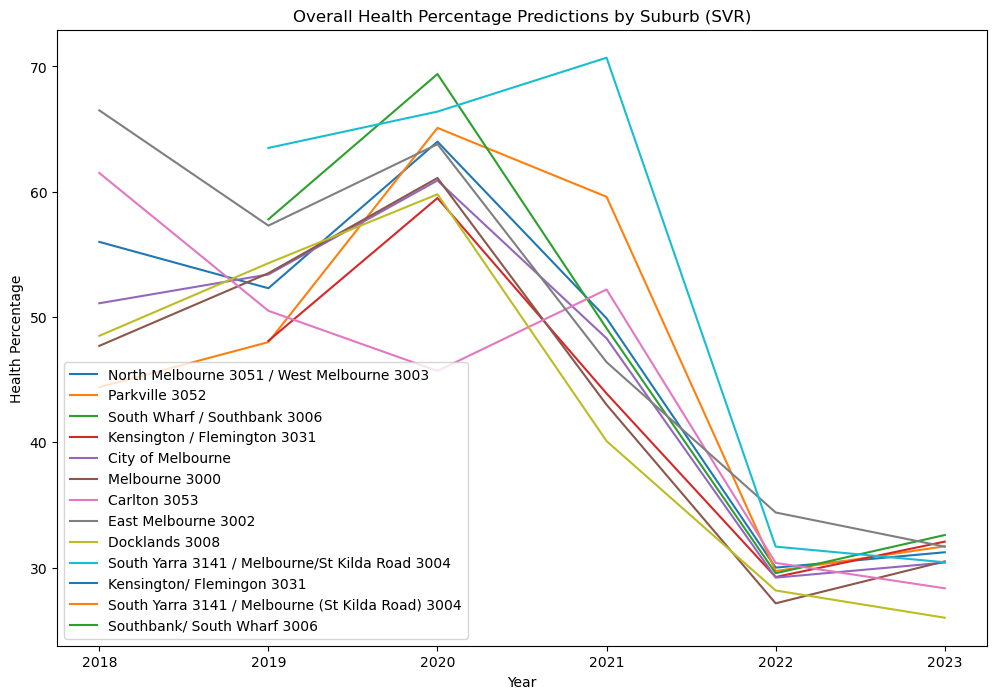

In [8]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = 'self_reported_health.csv'
df = pd.read_csv(file_path)

#filter Suburb data
suburb_data = df[df['Category'] == 'Suburb']

#
# Initialize lists to store results
predicted_years = []
predicted_percentages = []

# Iterate over each suburb
for suburb in suburb_data['Subcategory'].unique():
    # Filter data for the current suburb
    suburb_specific_data = suburb_data[suburb_data['Subcategory'] == suburb]
    
    # Extract features and target
    X = suburb_specific_data['Year'].values.reshape(-1, 1)
    y = suburb_specific_data['percentage'].values
    
    # Scale the data for SVM
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()
    X_scaled = scaler_X.fit_transform(X)
    y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()
    
    # Train SVR model
    svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
    svr_model.fit(X_scaled, y_scaled)
    
    # Predict for the next two years
    future_years = np.array([2024, 2025]).reshape(-1, 1)
    future_years_scaled = scaler_X.transform(future_years)
    predictions_scaled = svr_model.predict(future_years_scaled)
    
    # Reshape and inverse transform the scaled predictions
    predictions_scaled = predictions_scaled.reshape(-1, 1)
    predictions = scaler_y.inverse_transform(predictions_scaled).flatten()
    
    # Append results
    predicted_years.extend(future_years.flatten())
    predicted_percentages.extend(predictions)

    
    # Plot actual and predicted data for the suburb
    plt.figure()
    plt.scatter(X, y, label='Actual Data', color='blue')
    plt.plot(np.vstack((X, future_years)), 
             np.hstack((y, predictions)), 
             label='Prediction', color='red', linestyle='--')
    plt.title(f"Health Percentage Prediction for {suburb} (SVR)")
    plt.xlabel("Year")
    plt.ylabel("Health Percentage")
    plt.legend()
    plt.show()

# Combine predictions with original data for a summary plot
predicted_df = pd.DataFrame({
    'Year': predicted_years,
    'percentage': predicted_percentages,
    'Subcategory': 'Predicted'
})
combined_data = pd.concat([suburb_data, predicted_df])

# Plot overall results for all suburbs
plt.figure(figsize=(12, 8))
for suburb in suburb_data['Subcategory'].unique():
    suburb_combined = combined_data[combined_data['Subcategory'] == suburb]
    plt.plot(suburb_combined['Year'], suburb_combined['percentage'], label=suburb)

plt.title("Overall Health Percentage Predictions by Suburb (SVR)")
plt.xlabel("Year")
plt.ylabel("Health Percentage")
plt.legend()
plt.show()


## Accuracy Comparison


In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions for training data (Linear Regression)
lr_train_predictions = model.predict(X_scaled)
lr_train_predictions = scaler_y.inverse_transform(lr_train_predictions.reshape(-1, 1)).flatten()

# Predictions for training data (SVM)
svm_train_predictions = svr_model.predict(X_scaled)
svm_train_predictions = scaler_y.inverse_transform(svm_train_predictions.reshape(-1, 1)).flatten()

# Compute metrics for Linear Regression
lr_mae = mean_absolute_error(y, lr_train_predictions)
lr_mse = mean_squared_error(y, lr_train_predictions)
lr_r2 = r2_score(y, lr_train_predictions)

# Compute metrics for SVM
svm_mae = mean_absolute_error(y, svm_train_predictions)
svm_mse = mean_squared_error(y, svm_train_predictions)
svm_r2 = r2_score(y, svm_train_predictions)

# Print results
print("Linear Regression Performance:")
print(f"Mean Absolute Error (MAE): {lr_mae:.2f}")
print(f"Mean Squared Error (MSE): {lr_mse:.2f}")
print(f"R² Score: {lr_r2:.2f}")

print("\nSVM Performance:")
print(f"Mean Absolute Error (MAE): {svm_mae:.2f}")
print(f"Mean Squared Error (MSE): {svm_mse:.2f}")
print(f"R² Score: {svm_r2:.2f}")


Linear Regression Performance:
Mean Absolute Error (MAE): 44.60
Mean Squared Error (MSE): 1989.16
R² Score: nan

SVM Performance:
Mean Absolute Error (MAE): 0.00
Mean Squared Error (MSE): 0.00
R² Score: nan


C:\Users\hudaa\anaconda3\envs\SIT320\lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

C:\Users\hudaa\anaconda3\envs\SIT320\lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.



### Explanation of Metrics:
*Mean Absolute Error (MAE):*

Measures the average magnitude of errors in predictions.
Lower is better.

*Mean Squared Error (MSE):*
Penalizes larger errors more than smaller ones (due to squaring).
Lower is better.

*R² Score:*
Represents the proportion of variance explained by the model.
Ranges from 0 to 1, where closer to 1 indicates better performance.